In [3]:

import cv2 as cv
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

In [6]:
# Отображает каждую точку изображения на шаблон этого изображения , считая что комплесный ноль нажодится в (X/2, Y/2)
def pic2pic(image_first , func , norm):
    image = image_first.copy()
    X = image.shape[0]
    Y = image.shape[1]
    image = image*0     #Темный фон
    print(X,Y)
    for i in range(X):
        for k in range(Y):
            point = (np.complex(i + k*1j) - X/2 - Y/2*1j )/norm
            point = func(point) * norm 
            point = point + X/2 + Y/2*1j 
            x = int(np.real(point)) 
            y = int(np.imag(point))
            if x < X and y < Y and 0 <= x and 0<= y :
                image[y][x] = image_first[i][k]
    # plt.imshow(image)
    return image

In [7]:
def create_circle(radius , shape) :
    height = width = shape
    center = shape/2
    blank_image = np.zeros((height,width,3), np.uint8)
    for i in range(shape) :
        for j in range(shape) :
            if (i - center)**2 + ( j - center)**2 < radius**2 :
                blank_image[i][j] = (255,255,255)
    return blank_image

In [4]:
def testfunc(point):
    if point == 0 :
        return 0
    else :
        return 3/2 - 2/point + 1/2/point**2

400 400


C:\Users\user\AppData\Local\Temp\ipykernel_10700\1800546164.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point = (np.complex(i + k*1j) - X/2 - Y/2*1j )/norm


True

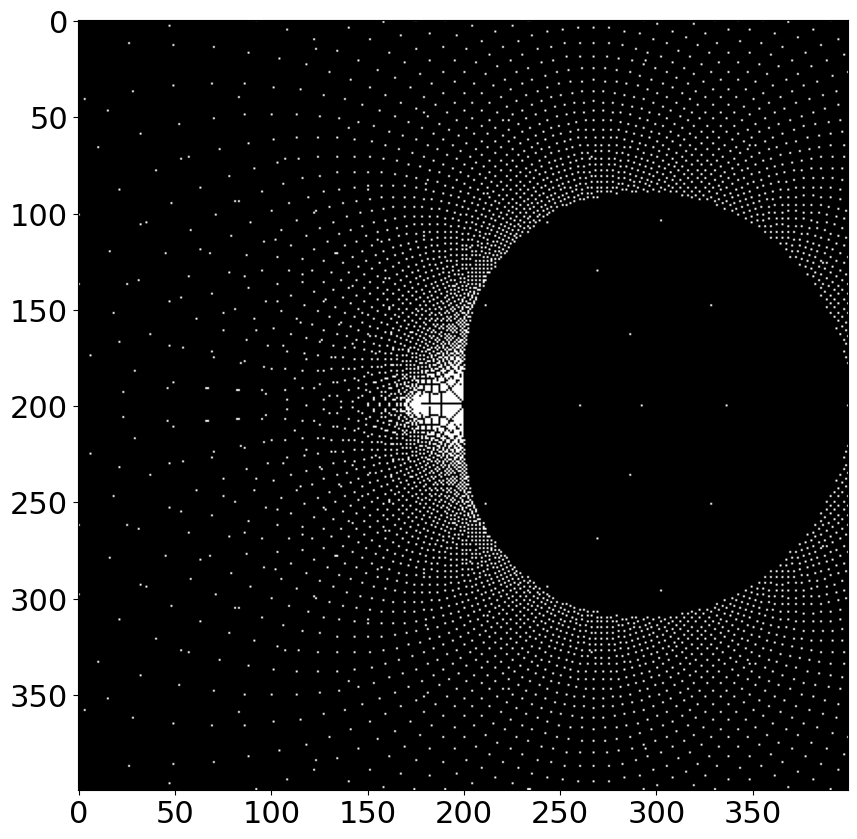

In [5]:
radius = 50
# Цена деления : norm пикселей = 1 
norm = 50 
image = create_circle(radius,400)

result = pic2pic(image, testfunc , norm)
plt.figure(figsize=(18, 10))
plt.imshow(result)
cv.imwrite('./img.png', result)


### В аргумент уравнения загоняется граница круга --> закрашиваются полученные точки

In [5]:
def solve_eq(func ,shape , norm , count):
    height = width = shape
    center = shape/2
    image = np.zeros((height,width,3), np.uint8)
    arr_phi = np.arange(0.0 , 2*np.pi, 2*np.pi/count )
    for phi in arr_phi :
        value = func(np.exp(phi*1j))
        point = value*norm 
        point = point + shape/2 +shape/2*1j
        x = int(np.real(point)) 
        y = int(np.imag(point))
        if x < shape and y < shape and 0 <= x and 0<= y :
            image[y][x] = (255,255,255)
    return image

In [58]:
def show_image(image,shape , norm):
    minor_ticks_x = np.arange(0, shape, norm/2)
    minor_ticks_y = np.arange(0, shape, norm/2)

    major_ticks_x = np.arange(0, shape, norm)
    major_ticks_y = np.arange(0, shape, norm)

    fig = plt.figure(figsize=(15, 15))
    axis = fig.add_subplot(111)
    # axis.set_ylim([0, 9])
    # axis.set_xlim([0, 9])
    plt.axhline(shape/2)
    plt.axvline(shape/2)
    axis.set_xticks(major_ticks_x)
    axis.set_yticks(major_ticks_y)
    axis.set_xticks(minor_ticks_x, minor=True)
    axis.set_yticks(minor_ticks_y, minor=True)
    axis.grid(which='minor', alpha=0.3)
    plt.savefig('img.png')
    plt.imshow(result)

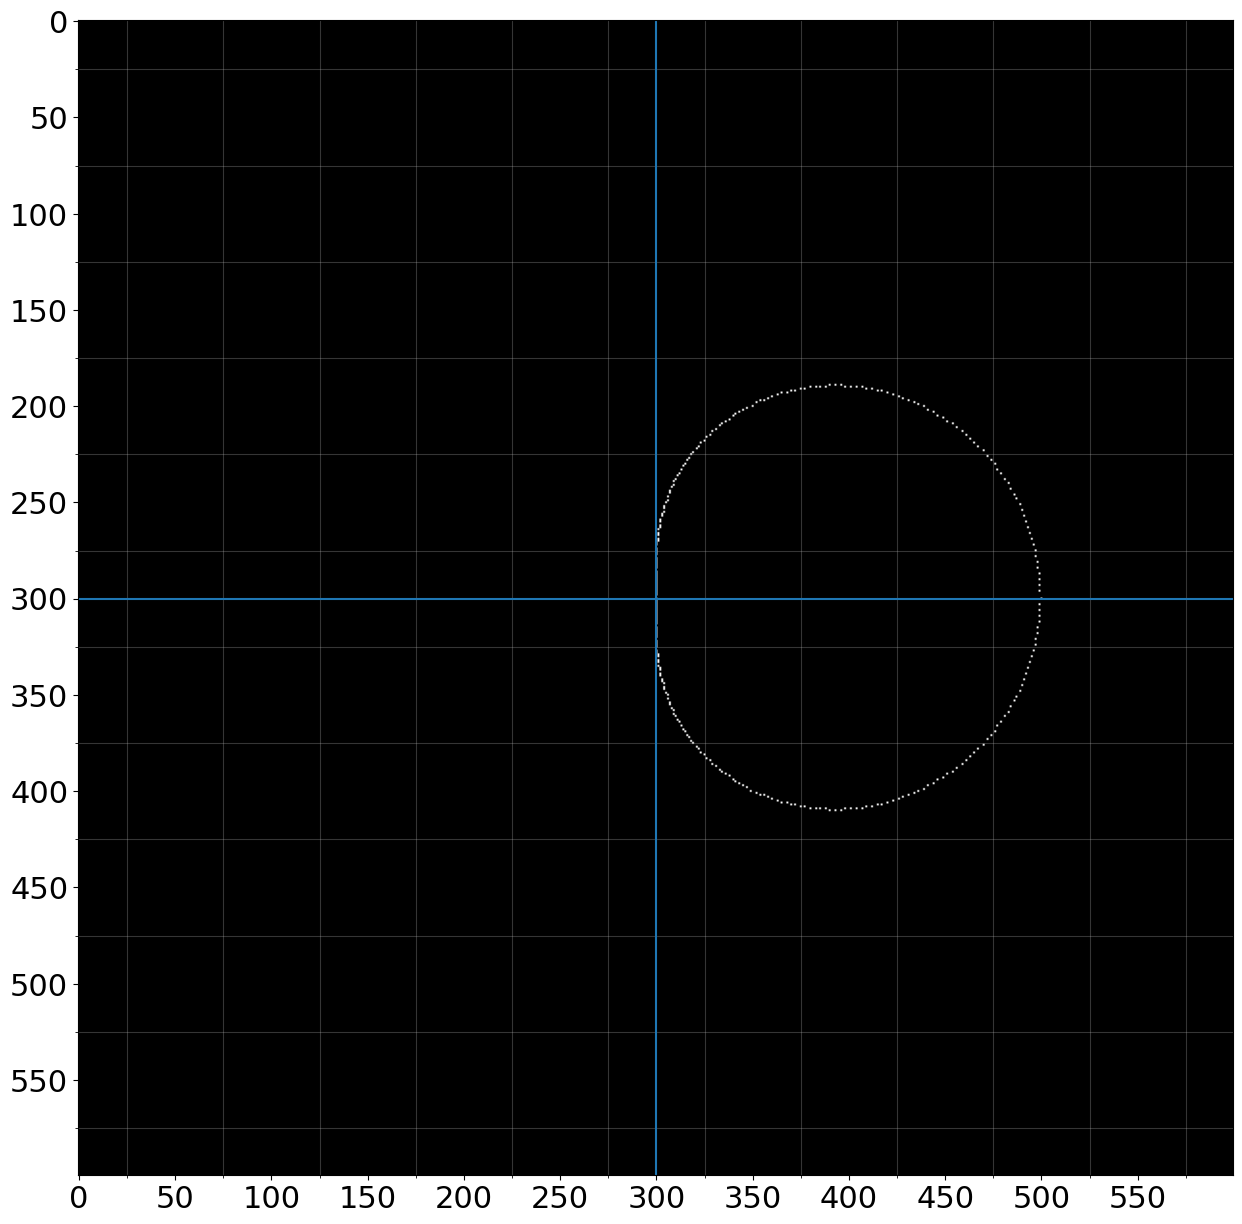

In [60]:

norm = 50
shape = 600
rad = shape/norm/2
count = 300
result = solve_eq(testfunc,shape ,norm , count)

show_image(result , shape , norm)
